In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.0 MB ? eta -:--:--
    --------------------------------------- 0.8/39.0 MB 1.7 MB/s eta 0:00:23
   - -------------------------------------- 1.0/39.0 MB 1.8 MB/s eta 0:00:22
   - -------------------------------------- 1.3/39.0 MB 1.8 MB/s eta 0:00:21
   - -------------------------------------- 1.8/39.0 MB 1.7 MB/s eta 0:00:23
   -- ------------------------------------- 2.4/39.0 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.6/39.0 MB 1.8 MB/s eta 0:00:20
   --- ------------------------------------ 3.1/39.0 MB 1.9 MB/s eta 0:00:19
   --- ------------------------------------ 3.4/39.0 MB 1.8 MB/s eta 0:00:20
   ---- ----------------------------------- 3.9/39.0 MB 1.9 MB/s eta 0:00:19
   ---- ----------------------------------- 4.2/39.0 MB 1.8 MB/s eta 0:00:20
   ---- ----------------------------------- 4.5/39.0 MB 1.8 MB/s eta 0:00:20
   ---- -----

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sobel_manual(imagem_caminho):
    
    # 1. Carregar imagem em escala de cinza
    img = cv2.imread(imagem_caminho, 0)
    img_original = cv2.imread(imagem_caminho)  # Para visualização final em cor
    if img is None:
        print("Erro ao carregar imagem")
        return

    # 2. Definição Manual dos Kernels (A Máscara de Convolução)
    # Sobel X: Derivada na horizontal (detecta bordas verticais)
    # Note a coluna da esquerda negativa e a da direita positiva.
    kernel_x = np.array([[-1, 0, 1],
                         [-2, 0, 2],
                         [-1, 0, 1]])

    # Sobel Y: Derivada na vertical (detecta bordas horizontais)
    # Note a linha de cima negativa e a de baixo positiva.
    kernel_y = np.array([[-1, -2, -1],
                         [ 0,  0,  0],
                         [ 1,  2,  1]])

    # 3. Aplicação da Convolução
    # filter2D realiza a operação de deslizar a matriz sobre a imagem.
    # Usamos float64 para não perder valores negativos (que indicam direção da borda).
    grad_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

    # 4. Cálculo da Magnitude (Teorema de Pitágoras)
    # G = raiz_quadrada(Gx^2 + Gy^2)
    magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))

    # 5. Cálculo da Direção (Arco Tangente)
    # theta = arctan(Gy / Gx)
    # np.arctan2 lida melhor com divisões por zero do que arctan simples
    direcao = np.arctan2(grad_y, grad_x)

    # 6. Normalização para visualização (0 a 255)
    # A magnitude pode ser muito alta, então normalizamos para caber em 8 bits.
    magnitude_vis = np.uint8(255 * magnitude / np.max(magnitude))
    
    # Visualizar a direção requer um mapa de cores, pois os valores são radianos (-pi a pi)
    # Vamos converter radianos para graus para facilitar o entendimento (opcional)
    direcao_graus = np.degrees(direcao)

    # --- Plotagem ---
    plt.figure(figsize=(12, 8))

    # Imagem Original
    plt.subplot(2, 2, 1)
    plt.imshow(img_original[..., ::-1])  # Convert BGR para RGB
    plt.title('Imagem Original')
    plt.axis('off')

    # Gradiente X (Bordas Verticais)
    plt.subplot(2, 2, 2)
    # Usamos valor absoluto aqui apenas para visualização
    plt.imshow(np.abs(grad_x), cmap='gray')
    plt.title('Gradiente X (Cálculo Manual)')
    plt.axis('off')

    # Gradiente Y (Bordas Horizontais)
    plt.subplot(2, 2, 3)
    plt.imshow(np.abs(grad_y), cmap='gray')
    plt.title('Gradiente Y (Cálculo Manual)')
    plt.axis('off')

    # Magnitude Final
    plt.subplot(2, 2, 4)
    plt.imshow(magnitude_vis, cmap='gray')
    plt.title('Magnitude do Gradiente (Pitágoras)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return grad_x, grad_y, magnitude, direcao

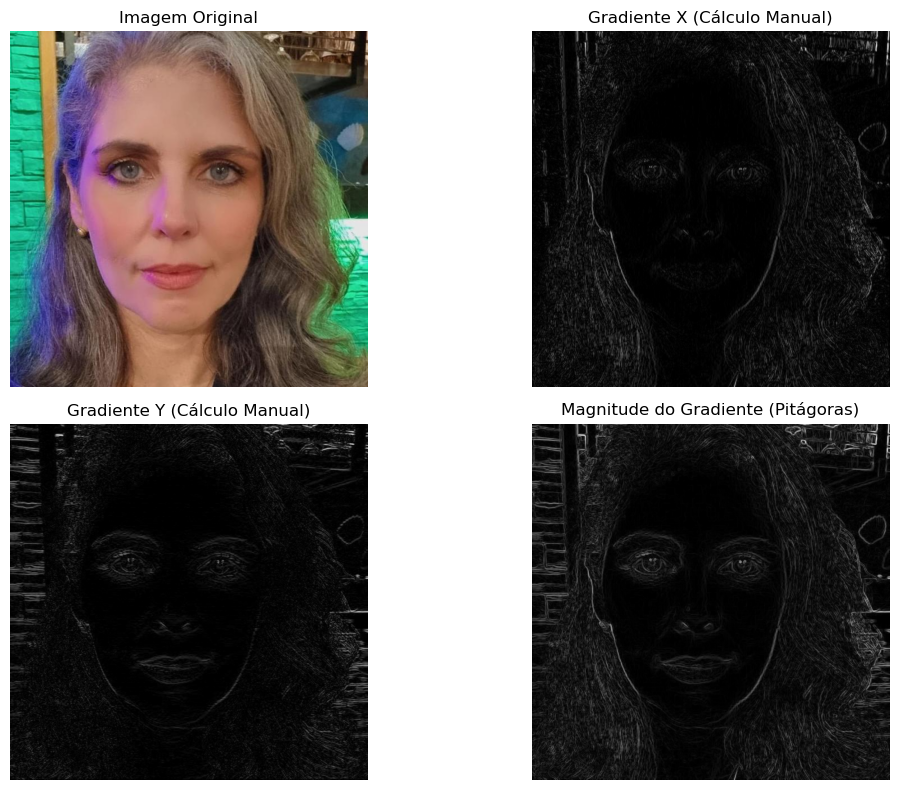

(array([[  0.,   2., -12., ..., 410., 528.,   0.],
        [  0.,   8.,  -6., ..., 436., 528.,   0.],
        [  0.,  11.,   4., ..., 485., 522.,   0.],
        ...,
        [  0.,   5., -32., ..., -49., -32.,   0.],
        [  0., -18., -46., ..., -67., -60.,   0.],
        [  0., -32., -52., ..., -70., -70.,   0.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [-16., -10.,   2., ...,  70.,  96.,  96.],
        [  4.,   1.,   2., ...,  47.,  64.,  58.],
        ...,
        [  4.,  -5., -22., ...,  15., -18., -36.],
        [ 14.,   0., -20., ...,  15.,   2.,  -8.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([[  0.        ,   2.        ,  12.        , ..., 410.        ,
         528.        ,   0.        ],
        [ 16.        ,  12.80624847,   6.32455532, ..., 441.58351419,
         536.6563146 ,  96.        ],
        [  4.        ,  11.04536102,   4.47213595, ..., 487.27199796,
         525.90873733,  58.        ],
        ...,
        [  4.        

In [6]:
sobel_manual('src/teste_sobel.png')

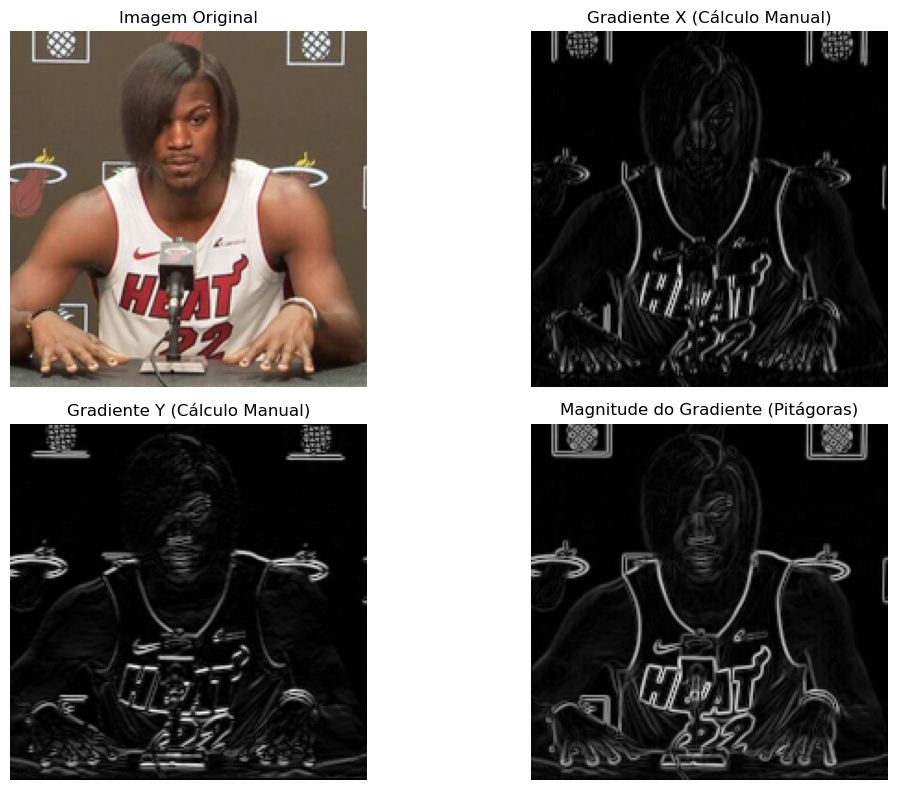

(array([[  0.,  -4.,  10., ...,  -6., -12.,   0.],
        [  0.,  -2.,   6., ...,  -7., -11.,   0.],
        [  0.,   3.,  -3., ...,  -8.,  -6.,   0.],
        ...,
        [  0.,   8.,  -3., ..., -14.,  34.,   0.],
        [  0.,  10., -15., ..., -20.,  34.,   0.],
        [  0.,   6., -20., ..., -20.,  38.,   0.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  6.,   8.,   6., ...,  -1.,  -1.,   0.],
        [  0.,   3.,   1., ...,   0.,   4.,   8.],
        ...,
        [ 38.,  44.,  43., ...,  22.,  12.,   8.],
        [-12., -16., -25., ...,  80.,  84.,  88.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([[ 0.        ,  4.        , 10.        , ...,  6.        ,
         12.        ,  0.        ],
        [ 6.        ,  8.24621125,  8.48528137, ...,  7.07106781,
         11.04536102,  0.        ],
        [ 0.        ,  4.24264069,  3.16227766, ...,  8.        ,
          7.21110255,  8.        ],
        ...,
        [38.        , 44.72135955, 43.1

In [7]:
sobel_manual('src/buttler.png')

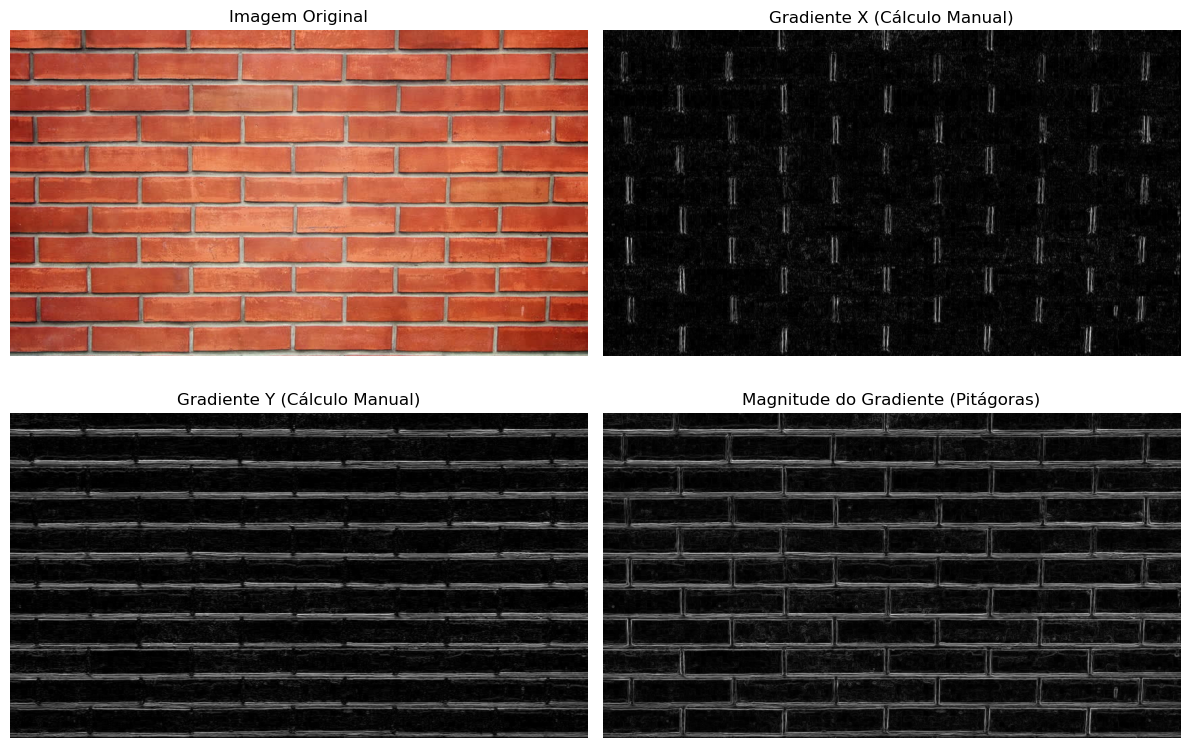

(array([[  0., -56., -20., ...,   8.,  12.,   0.],
        [  0., -56., -29., ...,   5.,   8.,   0.],
        [  0., -46., -35., ...,   0.,   0.,   0.],
        ...,
        [  0.,   3.,   4., ...,  -7., -10.,   0.],
        [  0.,   5.,   4., ...,  -1.,   0.,   0.],
        [  0.,   6.,   4., ...,   6.,  10.,   0.]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [-56., -56., -65., ..., -13., -20., -24.],
        [ 12.,  22.,  35., ..., -14., -20., -24.],
        ...,
        [184., 185., 186., ..., 247., 246., 246.],
        [106., 107., 108., ...,  99., 116., 126.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([[  0.        ,  56.        ,  20.        , ...,   8.        ,
          12.        ,   0.        ],
        [ 56.        ,  79.19595949,  71.1758386 , ...,  13.92838828,
          21.54065923,  24.        ],
        [ 12.        ,  50.99019514,  49.49747468, ...,  14.        ,
          20.        ,  24.        ],
        ...,
        [184.        

In [9]:
sobel_manual('src/tijolos.jpg')

In [ ]:
sobel_manual('src/coins.jpg')

Erro ao carregar imagem
